<a href="https://colab.research.google.com/github/ilmar85/fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Обнаружение мошенничества с  банковскими транзакциями**

**Обнаружение мошенничест производилось путем:**
*   Классификации
*   Поиском выбросов
*   Нейронной сети

Анализ и предобработка:






In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
import itertools
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !wget https://www.dropbox.com/s/kvdn3ufqe1jlau3/creditcard.csv

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/set.csv")

In [ ]:
# data = pd.read_csv("creditcard.csv")

In [ ]:
data

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,id_1912,Transaction,-1,08.11.2019,69,Russian_Ruble,69,Russian_Ruble,4899,4899_Cable_Services,Покупка_в_ТСП_через_чужой_POS,0,0,Дебетовая_карта,1
1,id_1912,Transaction,-1,28.11.2019,80,Russian_Ruble,80,Russian_Ruble,6012,6012_Member_Financial_Institutio,Прочее,0,0,Дебетовая_карта,1
2,id_0874,Transaction,1,18.10.2019,13000,Russian_Ruble,13000,Russian_Ruble,6012,6012_Member_Financial_Institutio,Зачисление_средств_на_карточный_счет_через_инф...,0,0,Дебетовая_карта,1
3,id_0874,Transaction,-1,03.12.2019,113.24,Russian_Ruble,113.24,Russian_Ruble,5411,5411_Grocery_Stores.supermarkets,Покупка_в_ТСП_через_POS_АББ,0,0,Дебетовая_карта,1
4,id_0874,Transaction,1,30.10.2019,5000,Russian_Ruble,5000,Russian_Ruble,6012,6012_Member_Financial_Institutio,Зачисление_средств_на_карточный_счет_через_инф...,0,0,Дебетовая_карта,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,Id_3836,Transaction,-1,43815,644233.69,Russian_Ruble,644233.69,644233.69,6012,6012_Member_Financial_Institutio,Перевод_от_клиента_АББ_НЕ_клиенту_АББ_через_ин...,0,0,Дебетовая_карта,0
935552,Id_1846,Transaction,-1,43811,269927.97,Russian_Ruble,269927.97,269927.97,6012,6012_Member_Financial_Institutio,Перевод_от_клиента_АББ_НЕ_клиенту_АББ_через_ин...,0,0,Дебетовая_карта,0
935553,Id_8126,Transaction,-1,43813,721435.41,Russian_Ruble,721435.41,721435.41,6012,6012_Member_Financial_Institutio,Перевод_от_клиента_АББ_НЕ_клиенту_АББ_через_ин...,0,0,Дебетовая_карта,0
935554,Id_9369,Transaction,-1,43777,774410.24,Russian_Ruble,774410.24,774410.24,6012,6012_Member_Financial_Institutio,Перевод_от_клиента_АББ_НЕ_клиенту_АББ_через_ин...,0,0,Дебетовая_карта,0


In [ ]:
df=data
df['Summ'].values.reshape(-1, 1)
df['Summ']=df['Summ'].str.replace('[^0-9]', '0') 
print(df)
df = df.drop(['Date_Of_transaction'], axis=1) 
stacked=data.stack()
data=pd.Series(stacked.factorize()[0],index=stacked.index,).unstack()
print(data)
i=data[:1]['Class'].values[0]
data['Class']=np.where(data['Class']==i,1,0)
data['Summ'] = StandardScaler().fit_transform(data['Summ'].values.reshape(-1, 1))
print(data)
data.dropna()

       client_id operation_type  ...        Card_type Class
0        id_1912    Transaction  ...  Дебетовая_карта     1
1        id_1912    Transaction  ...  Дебетовая_карта     1
2        id_0874    Transaction  ...  Дебетовая_карта     1
3        id_0874    Transaction  ...  Дебетовая_карта     1
4        id_0874    Transaction  ...  Дебетовая_карта     1
...          ...            ...  ...              ...   ...
935551   Id_3836    Transaction  ...  Дебетовая_карта     0
935552   Id_1846    Transaction  ...  Дебетовая_карта     0
935553   Id_8126    Transaction  ...  Дебетовая_карта     0
935554   Id_9369    Transaction  ...  Дебетовая_карта     0
935555   Id_6034    Transaction  ...  Дебетовая_карта     0

[935556 rows x 15 columns]
        client_id  operation_type  ...  Card_type  Class
0             0.0             1.0  ...       10.0   11.0
1             0.0             1.0  ...       10.0   11.0
2            17.0             1.0  ...       10.0   11.0
3            17.0       

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,0.0,1.0,2.0,3.0,-0.505253,5.0,4.0,5.0,6.0,7.0,8.0,9.0,9.0,10.0,1
1,0.0,1.0,2.0,12.0,-0.505090,5.0,13.0,5.0,14.0,15.0,16.0,9.0,9.0,10.0,1
2,17.0,1.0,11.0,18.0,-0.504980,5.0,19.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
3,17.0,1.0,2.0,21.0,-0.504926,5.0,23.0,5.0,24.0,25.0,26.0,9.0,9.0,10.0,1
4,17.0,1.0,11.0,27.0,-0.504817,5.0,28.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0


In [ ]:
data=data.dropna(how="any")

In [ ]:
data

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,0.0,1.0,2.0,3.0,-0.505253,5.0,4.0,5.0,6.0,7.0,8.0,9.0,9.0,10.0,1
1,0.0,1.0,2.0,12.0,-0.505090,5.0,13.0,5.0,14.0,15.0,16.0,9.0,9.0,10.0,1
2,17.0,1.0,11.0,18.0,-0.504980,5.0,19.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
3,17.0,1.0,2.0,21.0,-0.504926,5.0,23.0,5.0,24.0,25.0,26.0,9.0,9.0,10.0,1
4,17.0,1.0,11.0,27.0,-0.504817,5.0,28.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0


Количество двух классов

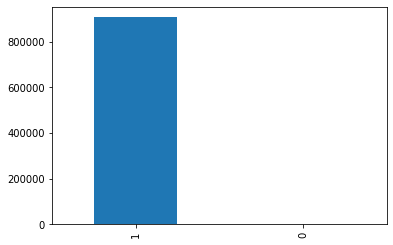

1    906064
0      1000
Name: Class, dtype: int64

In [ ]:
counts = pd.value_counts(data.Class, sort = True)
counts.plot(kind = 'bar')
plt.show()
counts

Видно, что выборка несбалансированная


Посмотрим, поведение мошенников:

In [ ]:
# data_fraud = data[data['Class'] == 1] 
# plt.figure(figsize=(20,8))
# plt.scatter(data_fraud['Date_Of_transaction'], data_fraud['Summ']) 
# plt.title('Транзакции мошенников')
# plt.xlabel('Time')
# plt.ylabel('Amount')
# plt.xlim([0,175000])
# plt.ylim([0,2500])
# plt.show()

Посмотрим, как коррелируют переменные:

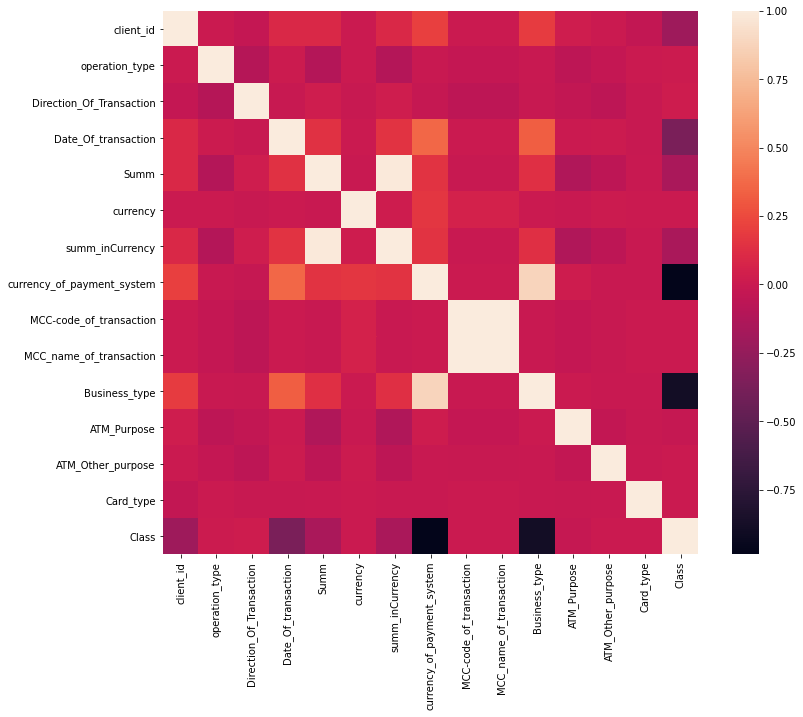

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)

Сбалансирование выборки

In [ ]:
data

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,0.0,1.0,2.0,3.0,-0.505253,5.0,4.0,5.0,6.0,7.0,8.0,9.0,9.0,10.0,1
1,0.0,1.0,2.0,12.0,-0.505090,5.0,13.0,5.0,14.0,15.0,16.0,9.0,9.0,10.0,1
2,17.0,1.0,11.0,18.0,-0.504980,5.0,19.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
3,17.0,1.0,2.0,21.0,-0.504926,5.0,23.0,5.0,24.0,25.0,26.0,9.0,9.0,10.0,1
4,17.0,1.0,11.0,27.0,-0.504817,5.0,28.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0


In [ ]:
data

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,0.0,1.0,2.0,3.0,-0.505253,5.0,4.0,5.0,6.0,7.0,8.0,9.0,9.0,10.0,1
1,0.0,1.0,2.0,12.0,-0.505090,5.0,13.0,5.0,14.0,15.0,16.0,9.0,9.0,10.0,1
2,17.0,1.0,11.0,18.0,-0.504980,5.0,19.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
3,17.0,1.0,2.0,21.0,-0.504926,5.0,23.0,5.0,24.0,25.0,26.0,9.0,9.0,10.0,1
4,17.0,1.0,11.0,27.0,-0.504817,5.0,28.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0


In [ ]:
df_train_all = data[800000:935300] 
df_train_all.dropna
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]

print("Кол-во транзакций мошенников: ", len(df_train_0))

Кол-во транзакций мошенников:  1000


In [ ]:
df_train_0

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
934556,249547.0,1.0,2.0,249548.0,4.030186,5.0,249550.0,249550.0,92.0,93.0,282.0,11.0,9.0,10.0,0
934557,249551.0,1.0,2.0,249552.0,4.030259,5.0,249554.0,249554.0,92.0,93.0,282.0,11.0,9.0,10.0,0
934558,249555.0,1.0,2.0,249556.0,4.030332,5.0,249558.0,249558.0,92.0,93.0,282.0,11.0,9.0,10.0,0
934559,249559.0,1.0,2.0,2121.0,4.030386,5.0,249561.0,249561.0,92.0,93.0,282.0,11.0,9.0,10.0,0
934560,249562.0,1.0,2.0,249563.0,4.030459,5.0,249565.0,249565.0,92.0,93.0,282.0,11.0,9.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0


In [ ]:
df_train_1

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
811962,99868.0,1.0,2.0,144.0,0.765531,5.0,69925.0,5.0,24.0,25.0,8.0,9.0,9.0,10.0,1
811963,99868.0,1.0,2.0,640.0,0.203911,5.0,39024.0,5.0,164.0,165.0,8.0,9.0,9.0,10.0,1
811964,99868.0,1.0,2.0,244.0,-0.493185,5.0,668.0,5.0,13353.0,13354.0,8.0,9.0,9.0,10.0,1
811965,99868.0,1.0,2.0,18.0,-0.494948,5.0,571.0,5.0,112.0,113.0,8.0,9.0,9.0,10.0,1
811966,99868.0,1.0,2.0,237.0,3.349539,5.0,212100.0,5.0,164.0,165.0,8.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934546,21501.0,1.0,2.0,56463.0,-0.409072,5.0,5296.0,5.0,509.0,510.0,8.0,9.0,9.0,10.0,1
934549,21607.0,1.0,2.0,56368.0,-0.389879,5.0,6352.0,5.0,24.0,25.0,8.0,9.0,9.0,10.0,1
934553,3412.0,1.0,2.0,56377.0,-0.503817,5.0,2113.0,5.0,160.0,161.0,16.0,9.0,9.0,10.0,1
934554,32939.0,1.0,2.0,56469.0,-0.421067,5.0,4637.0,5.0,24.0,25.0,8.0,9.0,9.0,10.0,1


In [ ]:
df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) 
df_train = df_train.sample(frac=1)

In [ ]:
print(len(df_train))

106364


In [ ]:
X_train = df_train.drop(['Date_Of_transaction', 'Class'],axis=1)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
X_train.shape

(106364, 13)

In [ ]:
X_train = df_train.drop(['Date_Of_transaction', 'Class'],axis=1)

In [ ]:
data.shape

(907064, 15)

Подготовим тренировочную выборку

In [ ]:
df_test_all = data[906000:996500]

X_test_all = df_test_all.drop(['Date_Of_transaction', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
print('Тренировочная выборка содержит: ', len(df_test_all[df_test_all['Class'] == 0]), 'мошеннических транзакций')

Тренировочная выборка содержит:  1000 мошеннических транзакций


In [ ]:
df_test_all.shape

(1064, 15)

In [ ]:
X_test_all.shape

(1064, 13)

In [ ]:
X_train.shape

(106364, 13)

## **Классификация**

**Классификация SVM**

In [ ]:
cls = svm.SVC(kernel='linear')
cls.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = cls.predict(X_test_all)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53a04234d0>)

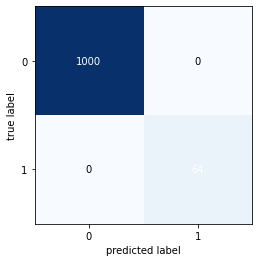

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm)

In [ ]:
cm

array([[1000,    0],
       [   0,   64]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy: ', accuracy_score(y_test_all, pred))

Accuracy:  1.0


In [ ]:
from sklearn.tree import export_graphviz

**Случайный лес**

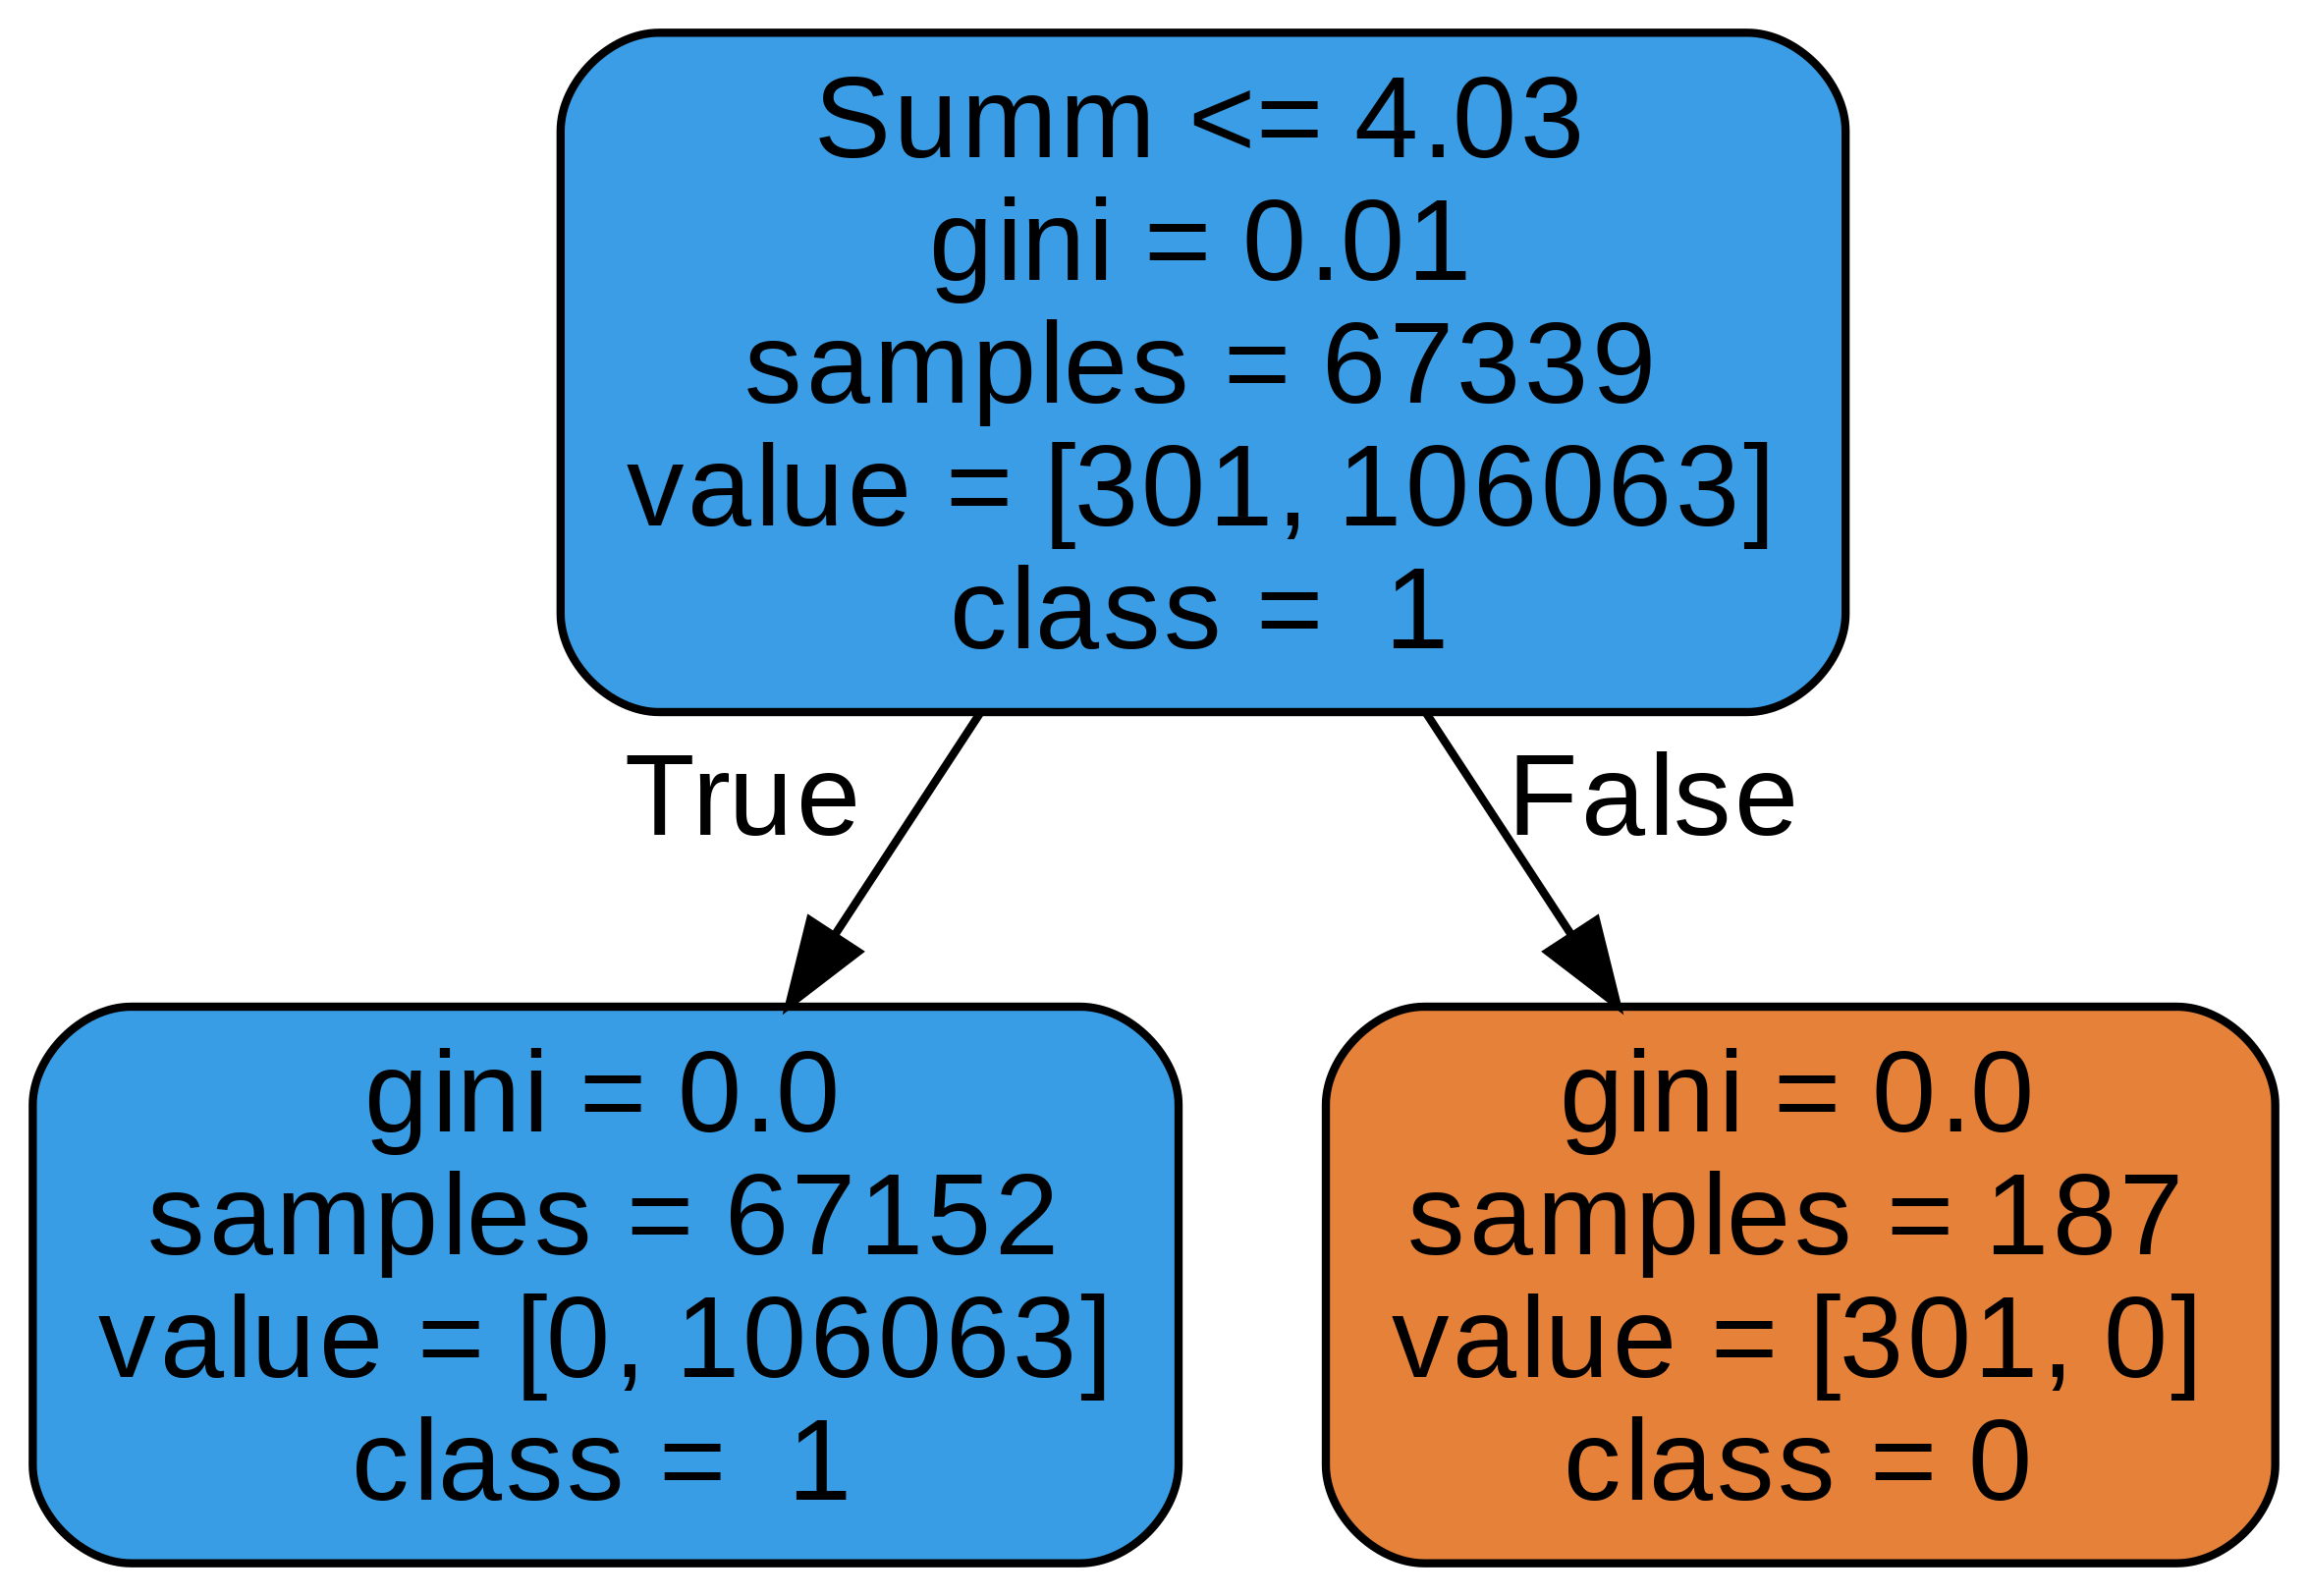

In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data.drop(['Date_Of_transaction', 'Class'], axis=1).columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
pred = model.predict(X_test_all)

print("Accuracy:", accuracy_score(y_test_all, pred))

Accuracy: 1.0


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53a056bf50>)

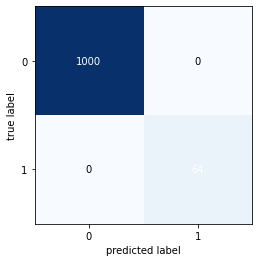

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm)

In [ ]:
cm

array([[1000,    0],
       [   0,   64]])

**LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier, SVC, XGBClassifier, RandomForestClassifier**

In [ ]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name, ":", cv_results.mean())

LR : 1.0
LDA : 1.0
KNN : 1.0
CART : 1.0
SVM : 1.0
XGB : 1.0
RF : 1.0


In [ ]:
results

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

Визуализация результатов

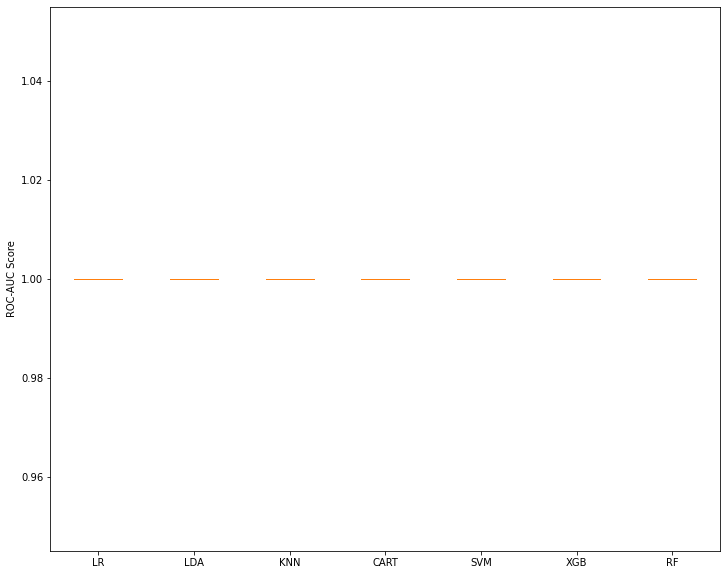

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## **Поиск выбросов**

Так как транзакции мошенников это тоже выбросы, то можно произвести поиск выбросов

**IsolationForest**

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['Date_Of_transaction', 'Class'], axis =1 )
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.8, random_state=42)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iforest = IsolationForest(contamination = 0.03,n_estimators = 100, max_samples = 0.6, max_features = 0.6,random_state = 42)
iforest.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.03,
                max_features=0.6, max_samples=0.6, n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53a05a8f10>)

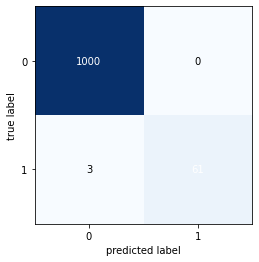

In [ ]:
pred = iforest.predict(X_test_all)
for n, i in enumerate(pred):
  if i == 1:
    pred[n] = 1
  elif i == -1:
    pred[n] = 0
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm)

In [ ]:
cm

array([[1000,    0],
       [   3,   61]])

**OneClassSVM**

In [ ]:
one_svm = svm.OneClassSVM(nu = 0.03,kernel = 'rbf')
one_svm.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.03, shrinking=True, tol=0.001, verbose=False)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53a059d350>)

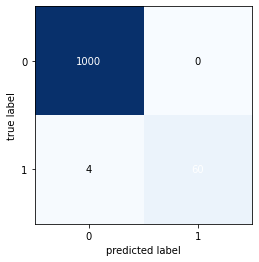

In [ ]:
pred = one_svm.predict(X_test_all)
for n, i in enumerate(pred):
  if i == 1:
    pred[n] = 1
  elif i == -1:
    pred[n] = 0
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm)

In [ ]:
cm

array([[1000,    0],
       [   4,   60]])

## **Нейронная сеть**

In [ ]:
from random import randint
from tensorflow import keras

In [ ]:
df = data.copy()

In [ ]:
y=df.pop('Class')
df.pop('Date_Of_transaction')
x=df.values
y=np.array(y)

KeyError: ignored

Рандомизация выборки

In [ ]:
x_stand=[]
y_stand=[]
for i in range(len(y)):
    if y[i]==1:
        x_stand.append(x[i])
        y_stand.append(1)
for r in range(2000):
    i=randint(0,len(y)-1)
    if y[i]==0:
        y_stand.append(0)
        x_stand.append(x[i])

x_stand=np.array(x_stand)
y_stand=np.array(y_stand)

Обучение

In [ ]:
epochs=90
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(13,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 17,602
Trainable params: 17,602
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico=model.fit(x_stand, y_stand, epochs=epochs,validation_split=0.1,verbose=3)

Epoch 1/90
Epoch 2/90
Epoch 3/90
Epoch 4/90
Epoch 5/90
Epoch 6/90
Epoch 7/90
Epoch 8/90
Epoch 9/90
Epoch 10/90
Epoch 11/90
Epoch 12/90
Epoch 13/90
Epoch 14/90
Epoch 15/90
Epoch 16/90
Epoch 17/90
Epoch 18/90
Epoch 19/90
Epoch 20/90
Epoch 21/90
Epoch 22/90
Epoch 23/90
Epoch 24/90
Epoch 25/90
Epoch 26/90
Epoch 27/90
Epoch 28/90
Epoch 29/90
Epoch 30/90
Epoch 31/90
Epoch 32/90
Epoch 33/90
Epoch 34/90
Epoch 35/90
Epoch 36/90
Epoch 37/90
Epoch 38/90
Epoch 39/90
Epoch 40/90
Epoch 41/90
Epoch 42/90
Epoch 43/90
Epoch 44/90
Epoch 45/90
Epoch 46/90
Epoch 47/90
Epoch 48/90
Epoch 49/90
Epoch 50/90
Epoch 51/90
Epoch 52/90
Epoch 53/90
Epoch 54/90
Epoch 55/90
Epoch 56/90
Epoch 57/90
Epoch 58/90
Epoch 59/90
Epoch 60/90
Epoch 61/90
Epoch 62/90
Epoch 63/90
Epoch 64/90
Epoch 65/90
Epoch 66/90
Epoch 67/90
Epoch 68/90
Epoch 69/90
Epoch 70/90
Epoch 71/90
Epoch 72/90
Epoch 73/90
Epoch 74/90
Epoch 75/90
Epoch 76/90
Epoch 77/90
Epoch 78/90
Epoch 79/90
Epoch 80/90
Epoch 81/90
Epoch 82/90
Epoch 83/90
Epoch 84/90
E

Результат после использования для всей выборки

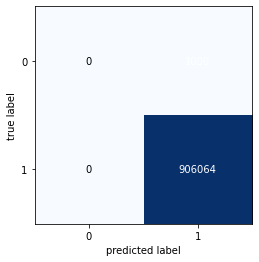

In [ ]:
cm = confusion_matrix(y_true=np.array(y), y_pred=np.array([np.argmax(u)for u in model.predict(x)]))
plot_confusion_matrix(cm)
plt.show()

In [ ]:
cm

array([[     0,   1000],
       [     0, 906064]])

In [ ]:
data

,client_id,operation_type,Direction_Of_Transaction,Date_Of_transaction,Summ,currency,summ_inCurrency,currency_of_payment_system,MCC-code_of_transaction,MCC_name_of_transaction,Business_type,ATM_Purpose,ATM_Other_purpose,Card_type,Class
0,0.0,1.0,2.0,3.0,-0.505253,5.0,4.0,5.0,6.0,7.0,8.0,9.0,9.0,10.0,1
1,0.0,1.0,2.0,12.0,-0.505090,5.0,13.0,5.0,14.0,15.0,16.0,9.0,9.0,10.0,1
2,17.0,1.0,11.0,18.0,-0.504980,5.0,19.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
3,17.0,1.0,2.0,21.0,-0.504926,5.0,23.0,5.0,24.0,25.0,26.0,9.0,9.0,10.0,1
4,17.0,1.0,11.0,27.0,-0.504817,5.0,28.0,5.0,14.0,15.0,20.0,9.0,9.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935551,252629.0,1.0,2.0,249738.0,4.086183,5.0,252631.0,252631.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935552,252632.0,1.0,2.0,250467.0,4.086238,5.0,252634.0,252634.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935553,252635.0,1.0,2.0,250157.0,4.086292,5.0,252637.0,252637.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
935554,252638.0,1.0,2.0,249548.0,4.086347,5.0,252640.0,252640.0,14.0,15.0,251545.0,9.0,9.0,10.0,0
